In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
#sc.logging.print_versions() 
sc.logging.print_header()
sc.settings.verbosity = 3  
sc.settings.set_figure_params(dpi=120, color_map='viridis')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
adata = sc.read('/home/jovyan/mounting_point/renal_covid_19_gex_myeloid_soupX_QC_orig.ident_annotated_levle23.h5ad',cache=True) #annotated data

In [3]:
adata

AnnData object with n_obs × n_vars = 126622 × 1215
    obs: 'annotation22_ES', 'centre', 'sample_id', 'sample_id_broad', 'sample_date', 'sample_date_yr', 'pool', 'pool_broad', 'haniffa_broad_predLabel', 'orig.ident', 'merged_souporcell_cluster', 'merged_souporcell_status', 'patient_id', 'case_control', 'WHO_severity', 'sex', 'calc_age', 'discharge_date', 'date_positive_swab', 'date_first_symptoms', 'admission_date', 'ethnicity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.8', '5_subcluster', '9_subcluster', 'annotation', 'annotation23_ES', 'annotation24_ES', 'annot3', 'annot2', 'annot1', 'leiden_0.5', 'annot4'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '5_subcluster_colors', '9_subcluster', '9_subcluster_colors', 'WHO_severity_colors', 'X_pca_harmony_orig.ident', 'annot1_colors', 'annot2_colors', 'annot3_colors', '

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


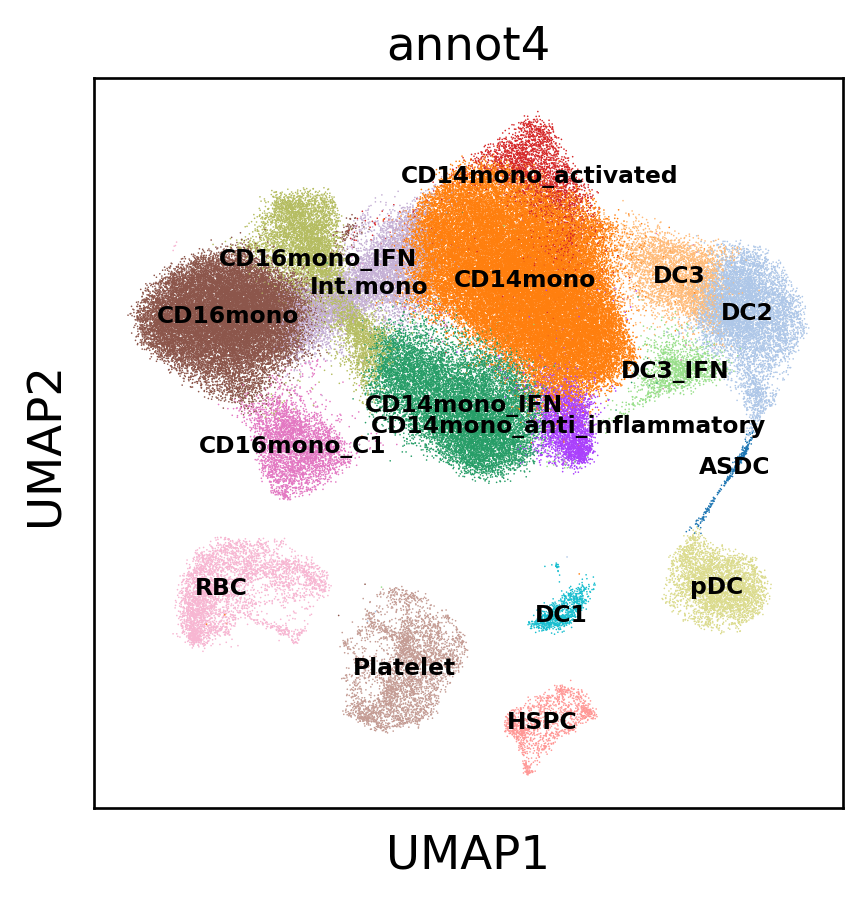

In [4]:
sc.pl.umap(adata,neighbors_key='X_pca_harmony_orig.ident',color=['annot4'], legend_fontsize = 7,legend_loc='on data')

In [5]:
list(adata.obs['annot4'].unique())

['CD14mono_activated',
 'CD16mono',
 'pDC',
 'CD14mono',
 'Int.mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'CD14mono_IFN',
 'RBC',
 'DC2',
 'Platelet',
 'CD14mono_anti_inflammatory',
 'HSPC',
 'DC3',
 'DC1',
 'DC3_IFN',
 'ASDC']

In [6]:
'C139' in list(adata.obs['sample_id_broad'].unique())

False

In [7]:
'C116' in list(adata.obs['sample_id_broad'].unique())

False

In [8]:
'C141' in list(adata.obs['sample_id_broad'].unique())

True

In [9]:
#remove C141 from the samples
adata = adata[~adata.obs['sample_id_broad'].isin(['C141'])]

In [10]:
'C141' in list(adata.obs['sample_id_broad'].unique())

False

In [11]:
#get monocyte only
monocyte = adata[adata.obs['annot4'].isin(['CD14mono_activated','CD16mono','CD14mono','Int.mono','CD16mono_C1','CD16mono_IFN','CD14mono_IFN','CD14mono_anti_inflammatory'])]

In [12]:
list(monocyte.obs['annot4'].unique())

['CD14mono_activated',
 'CD16mono',
 'CD14mono',
 'Int.mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'CD14mono_IFN',
 'CD14mono_anti_inflammatory']

In [13]:
list(monocyte.obs['case_control'].unique())

['NEGATIVE', 'nan', 'POSITIVE', 'RECOVERY']

In [14]:
#remove 'nan' from case_control
monocyte = monocyte[monocyte.obs['case_control']!='nan']

In [15]:
list(monocyte.obs['case_control'].unique())

['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [16]:
#getting p,n,r in wave 1 and wave 2

monocyte.obs['wave_case_control']='nan'
monocyte.obs.loc[(monocyte.obs["centre"]=='NCL') &(monocyte.obs["case_control"]=='POSITIVE'), "wave_case_control"] = 'wave1_positive'
monocyte.obs.loc[(monocyte.obs["centre"]=='NCL') &(monocyte.obs["case_control"]=='NEGATIVE'), "wave_case_control"] = 'wave1_negative'
monocyte.obs.loc[(monocyte.obs["centre"]=='NCL') &(monocyte.obs["case_control"]=='RECOVERY'), "wave_case_control"] = 'wave1_recovery'

monocyte.obs.loc[(monocyte.obs["centre"]=='Cambridge') &(monocyte.obs["case_control"]=='POSITIVE'), "wave_case_control"] = 'wave2_positive'
monocyte.obs.loc[(monocyte.obs["centre"]=='Cambridge') &(monocyte.obs["case_control"]=='NEGATIVE'), "wave_case_control"] = 'wave2_negative'
monocyte.obs.loc[(monocyte.obs["centre"]=='Cambridge') &(monocyte.obs["case_control"]=='RECOVERY'), "wave_case_control"] = 'wave2_recovery'

/tmp/ipykernel_5806/279369363.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  monocyte.obs['wave_case_control']='nan'
/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [17]:
list(monocyte.obs['wave_case_control'].unique()) #wave 1 doesn't have recovery samples

['wave1_negative',
 'wave1_positive',
 'wave2_positive',
 'wave2_negative',
 'wave2_recovery']

In [ ]:
test = monocyte[monocyte.obs['wave_case_control']=='wave2_recovery']
print (list(test.obs['case_control'].unique()))
print (list(test.obs['centre'].unique()))
print (list(test.obs['sample_date'].unique()))

In [ ]:
df = pd.crosstab(monocyte.obs['wave_case_control'],monocyte.obs['annot4'])
df

In [ ]:
#df.columns = df.columns.add_categories(['wave_case_control'])
df['wave_case_control'] = df.index # making index into column
df

In [ ]:
p1=df.plot(x='wave_case_control', kind='bar', stacked=True,
        title='distribution of monocytes in Wave 1 and Wave 2')
p1.set_ylabel("num of cells")
p1.set_xlabel(" ")
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  

In [ ]:
#getting percentage
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [ ]:
df

In [ ]:
df.sum(axis=1)

In [ ]:
monocyte.obs['wave_case_control'].value_counts()

In [ ]:
p2 = df.plot(x='wave_case_control', kind='bar', stacked=True,
        title='distribution of monocytes in Wave1 and Wave2',figsize=(5,5))
p2.set_ylabel('percentage')
p2.set_xlabel('')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  




p2.text(-0.2,101,'23749',fontsize=9)
p2.text(0.8,101,'22846',fontsize=9)
p2.text(1.8,101,'5364',fontsize=9)
p2.text(2.8,101,'34215',fontsize=9)
p2.text(3.8,101,'6008',fontsize=9)

# Getting wave 2 only 

In [18]:
monocyte_wave1 = monocyte[monocyte.obs['centre']=='NCL']
monocyte_wave2 = monocyte[monocyte.obs['centre']=='Cambridge']

In [19]:
monocyte_wave2.obs['case_control'].unique()

['POSITIVE', 'NEGATIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [20]:
monocyte_wave2.obs['wave_case_control'].unique()

array(['wave2_positive', 'wave2_negative', 'wave2_recovery'], dtype=object)

In [21]:
# adding steroid status and case_control conditions

monocyte_wave2.obs['steroid_status']='nan'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(monocyte_wave2.obs['case_control']=='POSITIVE'), "steroid_status"] = 'steroid_positive'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(monocyte_wave2.obs['case_control']=='NEGATIVE'), "steroid_status"] = 'steroid_negative'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(monocyte_wave2.obs['case_control']=='RECOVERY'), "steroid_status"] = 'steroid_recovery'

#####################

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(monocyte_wave2.obs['case_control']=='POSITIVE'), "steroid_status"] = 'no_steroid_positive'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(monocyte_wave2.obs['case_control']=='NEGATIVE'), "steroid_status"] = 'no_steroid_negative'


monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(monocyte_wave2.obs['case_control']=='RECOVERY'), "steroid_status"] = 'no_steroid_recovery'



/tmp/ipykernel_5806/2856638656.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  monocyte_wave2.obs['steroid_status']='nan'


In [22]:
list(monocyte_wave2.obs['steroid_status'].unique())

['steroid_positive',
 'no_steroid_positive',
 'no_steroid_negative',
 'no_steroid_recovery',
 'steroid_recovery',
 'steroid_negative']

In [23]:
print (list(monocyte_wave2.obs['sample_date'].unique()))

['04/02/2021', '22/01/2021', '28/01/2021', '06/01/2021', '16/04/2020', '30/01/2021', '02/02/2021', '15/01/2021', '25/02/2021', '11/03/2021', '22/04/2020', '23/01/2021', '30/04/2020', '19/01/2021', '09/02/2021', '27/01/2021', '12/01/2021', '26/01/2021', '04/03/2021', '07/01/2021', '14/01/2021', '20/01/2021', '16/01/2021', '09/03/2021', '29/01/2021', '10/02/2021', '12/05/2020', '10/03/2021', '03/02/2021', '11/01/2021', '08/02/2021', '18/01/2021', '01/02/2021', '26/05/2020', '05/02/2021', '25/01/2021', '13/01/2021', '06/02/2021']


In [ ]:
test = monocyte_wave2[monocyte_wave2.obs['steroid_status']=='no_steroid_negative']
print (test.obs['case_control'].unique())
print (test.obs['sample_date'].unique())

In [ ]:
test = monocyte_wave2[monocyte_wave2.obs['steroid_status']=='steroid_recovery']
print (test.obs['case_control'].unique())
print (test.obs['sample_date'].unique())
print(test.obs['sample_id_broad'].unique())

In [ ]:
df = pd.crosstab(monocyte_wave2.obs['steroid_status'],monocyte_wave2.obs['annot4'])
df

In [ ]:
#df.columns = df.columns.add_categories(['steroid_status'])
df['steroid_status'] = df.index # making index into column
df

In [ ]:
p1=df.plot(x='steroid_status', kind='bar', stacked=True,
        title='distribution of monocytes in different steroid status')
p1.set_xlabel('')
p1.set_ylabel('number of cells')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  

In [ ]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [ ]:
df.sum(axis=1)

In [ ]:
monocyte_wave2.obs['steroid_status'].value_counts()

In [ ]:
p2 = df.plot(x='steroid_status', kind='bar', stacked=True,
        title='distribution of monocytes in different steroid status',figsize=(5,5))
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  


p2.text(-0.2,101,'4107',fontsize=9)
p2.text(0.8,101,'21413',fontsize=9)
p2.text(1.8,101,'5033',fontsize=9)
p2.text(2.8,101,'1257',fontsize=9)
p2.text(3.8,101,'12802',fontsize=9)
p2.text(4.8,101,'975',fontsize=9)

# steroid only

In [24]:
# to get sub-samples who got steroid 
steroid = monocyte_wave2[monocyte_wave2.obs['sample_id_broad'].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])]


no_steroid = monocyte_wave2[monocyte_wave2.obs['sample_id_broad'].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190'])]


In [25]:
(list(steroid.obs['case_control'].unique()))

['POSITIVE', 'RECOVERY', 'NEGATIVE']

In [26]:
(list(steroid.obs['sample_id_broad'].unique()))

['C138', 'C101', 'C145', 'C146', 'C147', 'C33']

In [27]:
steroid.obs['discharge_date'].unique()

['03/02/2021', '21/01/2021', '25/01/2021', '26/01/2021', 'nan', '03/06/2021', '11/02/2021']
Categories (7, object): ['03/02/2021', '03/06/2021', '11/02/2021', '21/01/2021', '25/01/2021', '26/01/2021', 'nan']

In [28]:
#correction ##########
steroid.obs['discharge_date'] = steroid.obs['discharge_date'].astype('str')
steroid.obs.loc[steroid.obs["patient_id"] == "C65", "discharge_date"] = '10/06/2020'
steroid.obs['discharge_date'] = steroid.obs['discharge_date'].astype('category')

/tmp/ipykernel_5806/590398472.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  steroid.obs['discharge_date'] = steroid.obs['discharge_date'].astype('str')


In [29]:
tmp = steroid.copy()
tmp.obs['sample_date'] = tmp.obs['sample_date'].astype('object')
tmp.obs['date_first_symptoms'] = tmp.obs['date_first_symptoms'].astype('object')
tmp.obs['date_positive_swab'] = tmp.obs['date_positive_swab'].astype('object')



In [30]:
tmp.obs['date_positive_swab'].unique()

array(['16/01/2021', '02/01/2021', '05/01/2021', '09/01/2021', 'nan',
       '12/01/2021'], dtype=object)

In [31]:
tmp.obs['date_first_symptoms'].replace({'NA':np.nan}, inplace = True)
tmp.obs['date_positive_swab'].replace({'NA':np.nan}, inplace = True)

In [32]:
tmp.obs['date_first_symptoms'].unique()

array(['21/01/2021', '06/01/2021', '05/01/2021', 'nan', '14/01/2021'],
      dtype=object)

In [33]:
time_from_first_symptoms = pd.to_datetime(tmp.obs['sample_date'], format='%d/%m/%Y') - pd.to_datetime(tmp.obs['date_first_symptoms'], format='%d/%m/%Y')
time_from_positive_swab = pd.to_datetime(tmp.obs['sample_date'], format='%d/%m/%Y') - pd.to_datetime(tmp.obs['date_positive_swab'], format='%d/%m/%Y')

In [34]:
time_from_positive_swab.unique()

array([1641600000000000,  345600000000000, 1468800000000000,
       1209600000000000, 1555200000000000, 4060800000000000,
        604800000000000,            'NaT', 1382400000000000,
        259200000000000,  172800000000000,  777600000000000,
        864000000000000,  950400000000000, 4665600000000000,
       1036800000000000,  432000000000000], dtype='timedelta64[ns]')

In [35]:
days_from_first_symptoms = time_from_first_symptoms.dt.days
days_from_positive_swab = time_from_positive_swab.dt.days

In [36]:
days_from_positive_swab.unique()

array([19.,  4., 17., 14., 18., 47.,  7., nan, 16.,  3.,  2.,  9., 10.,
       11., 54., 12.,  5.])

In [37]:
days_from_first_symptoms.fillna(0, inplace = True)
days_from_positive_swab.fillna(0, inplace = True)

/tmp/ipykernel_5806/315576265.py:1: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  days_from_first_symptoms.fillna(0, inplace = True)
/tmp/ipykernel_5806/315576265.py:2: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  days_from_positive_swab.fillna(0, inplace = True)


In [38]:
days_from_positive_swab.unique()

array([19.,  4., 17., 14., 18., 47.,  7.,  0., 16.,  3.,  2.,  9., 10.,
       11., 54., 12.,  5.])

In [39]:
max(days_from_first_symptoms)


50.0

In [40]:
min(days_from_positive_swab)


0.0

In [41]:
days_from_infection = [max(a,b) for a,b in zip(days_from_first_symptoms, days_from_positive_swab)]


In [42]:
max(days_from_infection)


54.0

In [43]:
steroid.obs['time_from_first_symptoms'] = days_from_first_symptoms
steroid.obs['time_from_positive_swab'] = days_from_positive_swab
steroid.obs['time_from_infection'] = days_from_infection

In [44]:
steroid.obs['annot4'].unique()

['CD14mono_anti_inflammatory', 'CD16mono', 'CD14mono', 'CD14mono_IFN', 'CD16mono_IFN', 'CD16mono_C1', 'Int.mono', 'CD14mono_activated']
Categories (8, object): ['CD14mono', 'CD14mono_IFN', 'CD14mono_activated', 'CD14mono_anti_inflammatory', 'CD16mono', 'CD16mono_C1', 'CD16mono_IFN', 'Int.mono']

In [45]:
# adding dates of steroid inj for each patient
steroid.obs['steroid_date'] = 'nan'
steroid.obs.loc[steroid.obs["patient_id"] == "C146", "steroid_date"] = '22/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C139", "steroid_date"] = '07/02/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C147", "steroid_date"] = '17/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C145", "steroid_date"] = '05/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C138", "steroid_date"] = '28/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C33", "steroid_date"] = '20/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C101", "steroid_date"] = '07/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C141", "steroid_date"] = '02/02/2021'



In [46]:
list(steroid.obs['steroid_date'].unique())

['28/01/2021',
 '07/01/2021',
 '05/01/2021',
 '22/01/2021',
 '17/01/2021',
 '20/01/2021']

In [47]:
tmp = steroid.copy()
tmp.obs['sample_date'] = tmp.obs['sample_date'].astype('object')
time_from_steroid = pd.to_datetime(tmp.obs['sample_date'], format='%d/%m/%Y') - pd.to_datetime(tmp.obs['steroid_date'], format='%d/%m/%Y')


In [48]:
days_from_steroid = time_from_steroid.dt.days

In [49]:
days_from_steroid.max()

49

In [50]:
days_from_steroid.unique()

array([   7,   -1,    5,    2,   18,   34,   14,   -5, -273,   11,  -10,
          9,   -3,    1,   -6, -250,    6, -267, -262,    4,   49,   -4,
          0,   13,   -2,   -8])

In [51]:
steroid.obs['days_from_steroid'] = days_from_steroid

In [52]:
steroid.obs['days_from_steroid'].unique()

array([   7,   -1,    5,    2,   18,   34,   14,   -5, -273,   11,  -10,
          9,   -3,    1,   -6, -250,    6, -267, -262,    4,   49,   -4,
          0,   13,   -2,   -8])

In [53]:
# adding metdata about before and after steroid samples based on date of steroid injection
steroid.obs['steroid_timeline']='nan'

steroid.obs.loc[(steroid.obs["days_from_steroid"]<=0)&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline"] = 'before_steroid_pos'
steroid.obs.loc[(steroid.obs["days_from_steroid"]<=0)&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline"] = 'before_steroid_neg'
steroid.obs.loc[(steroid.obs["days_from_steroid"]<=0)&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline"] = 'before_steroid_rec'

##########################

steroid.obs.loc[(steroid.obs["days_from_steroid"]>0)&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline"] = 'after_steroid_pos'
steroid.obs.loc[(steroid.obs["days_from_steroid"]>0)&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline"] = 'after_steroid_neg'

steroid.obs.loc[(steroid.obs["days_from_steroid"]>0)&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline"] = 'after_steroid_rec'

steroid.obs['steroid_timeline']=steroid.obs['steroid_timeline'].astype('category')




In [54]:
steroid.obs['steroid_timeline'].unique()

['after_steroid_pos', 'before_steroid_pos', 'after_steroid_rec', 'before_steroid_neg']
Categories (4, object): ['after_steroid_pos', 'after_steroid_rec', 'before_steroid_neg', 'before_steroid_pos']

In [ ]:
#test = steroid[steroid.obs['steroid_timeline']=='after_steroid_neg']
#print(test.obs['case_control'].unique())

In [ ]:
df = pd.crosstab(steroid.obs['steroid_timeline'],steroid.obs['annot4'])
df

In [ ]:
#df.columns = df.columns.add_categories(['steroid_timeline'])
df['steroid_timeline'] = df.index # making index into column

In [ ]:
df

In [ ]:
df=df.reindex(['before_steroid_neg', "before_steroid_pos", "after_steroid_pos", "after_steroid_rec"])
df

In [ ]:
p1=df.plot(x='steroid_timeline', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid')
p1.set_ylabel('num of cells')
p1.set_xlabel('')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 

In [ ]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [ ]:
steroid.obs['steroid_timeline'].value_counts()

In [ ]:
p2 = df.plot(x='steroid_timeline', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid',figsize=(3,3))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 


'''
p2.text(-0.2,101,'1257',fontsize=9)
p2.text(0.8,101,'4879',fontsize=9)
p2.text(1.8,101,'7923',fontsize=9)
p2.text(2.8,101,'975',fontsize=9)
'''

# adding metadata

In [55]:
meta_obs=pd.read_csv('/home/jovyan/data/covid_19_renal/obs_myeloid.csv')

/tmp/ipykernel_5806/4236884049.py:1: DtypeWarning: Columns (54,58,62,74,78,82,86,144,145,146,147,149,150,151,161) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_obs=pd.read_csv('/home/jovyan/data/covid_19_renal/obs_myeloid.csv')


In [56]:
mdata = sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_gex_myeloid_soupX_QC.h5ad',cache=True)

In [57]:
mdata.obs['WHO_temp_severity'] = meta_obs['WHO_temp_severity'].values.astype("str") 
mdata.obs['WHO_temp_severity'] = mdata.obs['WHO_temp_severity'].astype('category')

In [58]:
steroid.obs['WHO_temp_severity'] = steroid.obs['sex'].astype('object')

In [59]:
steroid.obs['WHO_temp_severity'].update(pd.Series(mdata.obs['WHO_temp_severity'].astype('object')))

In [60]:
steroid.obs['WHO_temp_severity'] = steroid.obs['WHO_temp_severity'].astype('category')

In [61]:
steroid.obs['WHO_temp_severity'].unique()

['mild', 'severe', 'moderate', 'nan', 'critical']
Categories (5, object): ['critical', 'mild', 'moderate', 'nan', 'severe']

#  steroid with positive case only -divided into 4 severity 

In [62]:
steroid.obs['steroid_timeline'].unique()

['after_steroid_pos', 'before_steroid_pos', 'after_steroid_rec', 'before_steroid_neg']
Categories (4, object): ['after_steroid_pos', 'after_steroid_rec', 'before_steroid_neg', 'before_steroid_pos']

In [63]:
steroid_pos_only = steroid[steroid.obs['steroid_timeline'].isin(['before_steroid_pos','after_steroid_pos'])]

In [64]:
steroid_pos_only.obs['WHO_temp_severity'].unique()

['mild', 'severe', 'moderate', 'critical']
Categories (4, object): ['critical', 'mild', 'moderate', 'severe']

In [65]:
# adding severity and steroid meta
steroid_pos_only.obs['steroid_severity']='nan'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity"] = 'before_steroid_pos_mild'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity"] = 'before_steroid_pos_moderate'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity"] = 'before_steroid_pos_severe'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity"] = 'before_steroid_pos_critical'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity"] = 'after_steroid_pos_mild'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity"] = 'after_steroid_pos_moderate'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity"] = 'after_steroid_pos_severe'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity"] = 'after_steroid_pos_critical'


/tmp/ipykernel_5806/1759539440.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  steroid_pos_only.obs['steroid_severity']='nan'


In [66]:
steroid_pos_only.obs['steroid_severity'].unique()

array(['after_steroid_pos_mild', 'before_steroid_pos_severe',
       'after_steroid_pos_moderate', 'before_steroid_pos_moderate',
       'after_steroid_pos_critical', 'before_steroid_pos_mild',
       'after_steroid_pos_severe'], dtype=object)

In [ ]:
#test = steroid_pos_only[steroid_pos_only.obs['steroid_severity']=='after_steroid_pos_severe']
#print(test.obs['case_control'].unique())
#print(test.obs['WHO_temp_severity'].unique())

In [ ]:
df = pd.crosstab(steroid_pos_only.obs['steroid_severity'],steroid_pos_only.obs['annot4'])
df

In [ ]:
df.columns = df.columns.add_categories(['steroid_severity'])
df['steroid_severity'] = df.index 
df

In [ ]:
df=df.reindex(["before_steroid_pos_mild", "after_steroid_pos_mild", "before_steroid_pos_moderate",'after_steroid_pos_moderate','before_steroid_pos_severe','after_steroid_pos_severe',
              'after_steroid_pos_critical'])
df

In [ ]:
p1=df.plot(x='steroid_severity', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity')
p1.set_ylabel('num of cells')
p1.set_xlabel('')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 

In [ ]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [ ]:
df

In [ ]:
steroid_pos_only.obs['steroid_severity'].value_counts()

In [ ]:
p2 = df.plot(x='steroid_severity', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity',figsize=(5,5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 



p2.text(-0.2,101,'2678',fontsize=9)
p2.text(0.8,101,'1811',fontsize=9)
p2.text(1.8,101,'1911',fontsize=9)
p2.text(2.8,101,'2146',fontsize=9)
p2.text(3.8,101,'290',fontsize=9)
p2.text(4.8,101,'1226',fontsize=9)
p2.text(5.8,101,'2740',fontsize=9)

In [67]:
save_file = '/home/jovyan/scripts/renal_covid_19/scripts_for_publication/trend_of_cell_with_steroid/steroid_pos_only_all_monocyte.h5ad'
steroid_pos_only.write_h5ad(save_file)

In [ ]:
list(steroid_pos_only.obs['annot4'].unique())